# Boxplots Packages
*  Good tool to use when comparing multiple boxplots
   *  1 Variable with multiple subgroups - ie Mass of Penguins split by 3 stages of life
   *  Multiple Variables with one group - ie Sampling of a penguin population for mass
*  Not very helpful when analyzing a single variable - ie 1 Variable with 1 subgroup - choose a histogram instead
*  Box plots do not provide detailed information about the middle 50% of the data

References:
*  https://www.spss-tutorials.com/creating-boxplots-in-spss/
*  https://chartio.com/learn/charts/box-plot-complete-guide/

In [2]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.offline as pxo
import seaborn as sns
from bokeh.plotting import figure, show

In [3]:
# import data
# data origins:  https://www.kaggle.com/datasets/parulpandey/palmer-archipelago-antarctica-penguin-data?resource=download&select=penguins_size.csv 
penguin_iter_df = pd.read_csv("data/penguins_iter.csv")
penguin_size_df = pd.read_csv("data/penguins_size.csv")

In [4]:
# view full dataset
print(penguin_iter_df.shape)
penguin_iter_df.head()

(344, 17)


,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN


In [5]:
# view cleaned/summarized dataset
print(penguin_size_df.shape)
penguin_size_df.head()

(344, 7)


,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [6]:
# check data types for data integrity
penguin_size_df.dtypes

species               object
island                object
culmen_length_mm     float64
culmen_depth_mm      float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

In [7]:
# quick check of data distribution
penguin_size_df[['species', "sex"]].value_counts()

species    sex   
Adelie     FEMALE    73
           MALE      73
Gentoo     MALE      61
           FEMALE    58
Chinstrap  FEMALE    34
           MALE      34
Gentoo     .          1
dtype: int64

In [8]:
# If there is sex data labelled as "." then collect the index value and drop them
if len(penguin_size_df [ penguin_size_df["sex"]=="." ]) > 0:
    drop_index = penguin_size_df[ penguin_size_df['sex'] =="."].index
    penguin_size_df.drop(drop_index, axis="index", inplace=True)

# remove all NaN values
penguin_size_df.dropna(inplace=True)

# check that only Male/Female labels exist in the sex column
penguin_size_df[ ~penguin_size_df["sex"].isin(["MALE", "FEMALE"]) ]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex


In [9]:
# view data
print(penguin_size_df.shape )
penguin_size_df.head()

(333, 7)


,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


In [10]:
# create a new column made from species and gender - these are labels
# this is another form of binning but by aggregating labels instead of aggregating discrete numbers
df_long = penguin_size_df[['species', 'sex', 'body_mass_g']].copy()
df_long['group'] = df_long['species'] + "_" + df_long['sex']
df_long.drop(['species', 'sex'], axis='columns', inplace=True)
df_long

,body_mass_g,group
0,3750.0,Adelie_MALE
1,3800.0,Adelie_FEMALE
2,3250.0,Adelie_FEMALE
4,3450.0,Adelie_FEMALE
5,3650.0,Adelie_MALE
...,...,...
338,4925.0,Gentoo_FEMALE
340,4850.0,Gentoo_FEMALE
341,5750.0,Gentoo_MALE
342,5200.0,Gentoo_FEMALE


In [11]:
# create lists of data (by new labels)
body_mass_list = df_long.groupby(["group"])["body_mass_g"].apply(list)
body_mass_list

group
Adelie_FEMALE       [3800.0, 3250.0, 3450.0, 3625.0, 3200.0, 3700....
Adelie_MALE         [3750.0, 3650.0, 4675.0, 3800.0, 4400.0, 4500....
Chinstrap_FEMALE    [3500.0, 3525.0, 3950.0, 3250.0, 4150.0, 3800....
Chinstrap_MALE      [3900.0, 3650.0, 3725.0, 3750.0, 3700.0, 3775....
Gentoo_FEMALE       [4500.0, 4450.0, 4550.0, 4800.0, 4400.0, 4650....
Gentoo_MALE         [5700.0, 5700.0, 5400.0, 5200.0, 5150.0, 5550....
Name: body_mass_g, dtype: object

In [12]:
# create list of list names
names = body_mass_list.index.to_list()
names

['Adelie_FEMALE',
 'Adelie_MALE',
 'Chinstrap_FEMALE',
 'Chinstrap_MALE',
 'Gentoo_FEMALE',
 'Gentoo_MALE']

In [13]:
#  using new labels and generated lists, create dataframe by making a dictionary
dict_lists={}
for i in range(len(body_mass_list)):
    dict_lists[body_mass_list.index[i]] = body_mass_list[i]
df = pd.DataFrame.from_dict(dict_lists, orient='index').T  
df

,Adelie_FEMALE,Adelie_MALE,Chinstrap_FEMALE,Chinstrap_MALE,Gentoo_FEMALE,Gentoo_MALE
0,3800.0,3750.0,3500.0,3900.0,4500.0,5700.0
1,3250.0,3650.0,3525.0,3650.0,4450.0,5700.0
2,3450.0,4675.0,3950.0,3725.0,4550.0,5400.0
3,3625.0,3800.0,3250.0,3750.0,4800.0,5200.0
4,3200.0,4400.0,4150.0,3700.0,4400.0,5150.0
...,...,...,...,...,...,...
68,3050.0,3725.0,NaN,NaN,NaN,NaN
69,3000.0,3650.0,NaN,NaN,NaN,NaN
70,3475.0,4250.0,NaN,NaN,NaN,NaN
71,3450.0,3750.0,NaN,NaN,NaN,NaN


# Boxplot Tests
*  Below are boxplots using the data generated above.  

## Pandas Boxplots

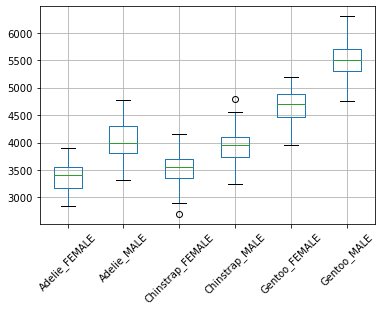

In [14]:
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.boxplot.html 
boxplot_pandas = df.boxplot() 
plt.xticks(rotation = 45);

## Matplotlib Boxplots

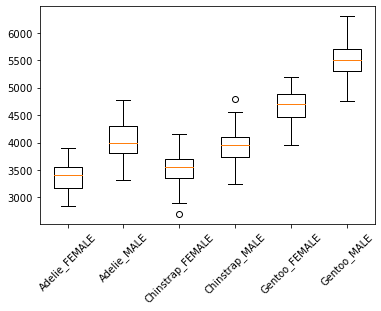

In [15]:
# note:  Need to use a list of lists to make this work.  Using the Dataframe does not work due to the NaN values in the dataframe
# https://matplotlib.org/3.5.0/api/_as_gen/matplotlib.pyplot.boxplot.html 
names = df.columns
plt.boxplot(body_mass_list, labels = names)
plt.xticks(rotation = 45);

## Plotly Boxplots

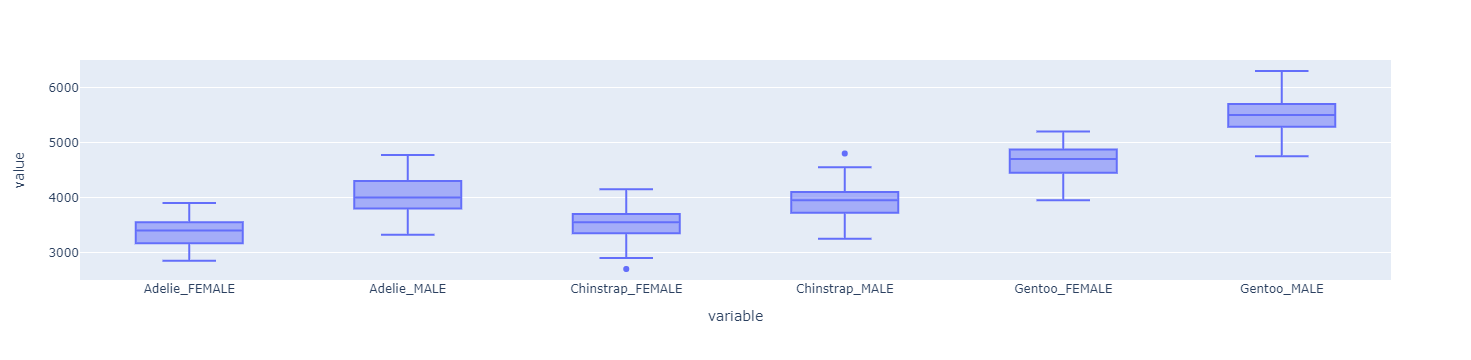

In [16]:
# https://plotly.com/python/box-plots/ 

# # Works for only Jupyter Notebook (old method)
# from plotly.offline import iplot
# fig = px.box(df)
# iplot(fig)

# Works for only Jupyter Notebook (new method)
pxo.init_notebook_mode(connected=True)
fig = px.box(df)
fig.show()

In [17]:
# Works for Jupyter Notebook and Jupyer Lab
fig = px.box(df)
fig.write_html('plotly_boxplot.html', auto_open=True)

## Seaborn Boxplots

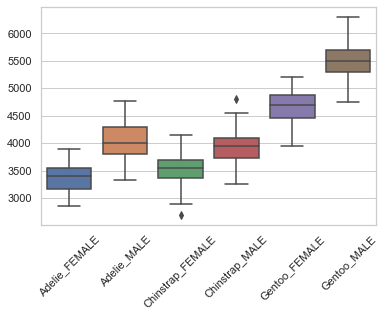

In [17]:
# https://seaborn.pydata.org/generated/seaborn.boxplot.html
# uses Matplotlib, returns ax which is a Matplotlib axis
sns.set_theme(style="whitegrid")
ax = sns.boxplot(data=df)
plt.xticks(rotation = 45);

## Seaborn Combo Plot

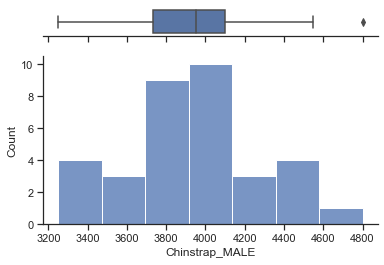

In [28]:
# This type of plot works well for a single variable

sns.set(style="ticks")

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, 
                                    gridspec_kw={"height_ratios": (.15, .85)})

sns.boxplot(data=df['Chinstrap_MALE'], ax=ax_box, orient="h")
sns.histplot(data=df['Chinstrap_MALE'], ax=ax_hist)

ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)

## Bokeh Boxplots

In [19]:
import numpy as np
import math

In [20]:
# find the quartiles and IQR for each category

groups = df_long.groupby('group')
cats = groups.apply(list).index.to_list()

q1 = groups.quantile(q=0.25)
q2 = groups.quantile(q=0.5)
q3 = groups.quantile(q=0.75)
iqr = q3 - q1
upper = q3 + 1.5*iqr
lower = q1 - 1.5*iqr

# find the outliers for each category
def outliers(group):
    cat = group.name
    return group[(group.body_mass_g > upper.loc[cat]['body_mass_g']) | (group.body_mass_g < lower.loc[cat]['body_mass_g'])]['body_mass_g']
out = groups.apply(outliers).dropna()

# prepare outlier data for plotting, we need coordinates for every outlier.
if not out.empty:
    outx = list(out.index.get_level_values(0))
    outy = list(out.values)

p = figure(tools="", background_fill_color="#efefef", x_range=cats, toolbar_location=None)

# if no outliers, shrink lengths of stems to be no longer than the minimums or maximums
qmin = groups.quantile(q=0.00)
qmax = groups.quantile(q=1.00)
upper.body_mass_g = [min([x,y]) for (x,y) in zip(list(qmax.loc[:,'body_mass_g']),upper.body_mass_g)]
lower.body_mass_g = [max([x,y]) for (x,y) in zip(list(qmin.loc[:,'body_mass_g']),lower.body_mass_g)]

# stems
p.segment(cats, upper.body_mass_g, cats, q3.body_mass_g, line_color="black")
p.segment(cats, lower.body_mass_g, cats, q1.body_mass_g, line_color="black")

# boxes
p.vbar(cats, 0.7, q2.body_mass_g, q3.body_mass_g, fill_color="#E08E79", line_color="black")
p.vbar(cats, 0.7, q1.body_mass_g, q2.body_mass_g, fill_color="#3B8686", line_color="black")

# whiskers (almost-0 height rects simpler than segments)
p.rect(cats, lower.body_mass_g, 0.2, 0.01, line_color="black")
p.rect(cats, upper.body_mass_g, 0.2, 0.01, line_color="black")

# outliers
if not out.empty:
    p.circle(outx, outy, size=6, color="#F38630", fill_alpha=0.6)

p.xgrid.grid_line_color = None
p.ygrid.grid_line_color = "white"
p.grid.grid_line_width = 2
p.xaxis.major_label_text_font_size="16px"
p.xaxis.major_label_orientation = math.pi/4

show(p)